# Model Comparison

## 1. Preprocessing

### 1.1 Prepare test data for the decision trees

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

# Load test data
data_test = pd.read_csv('data/data_test.csv')

feature_names = ['age', 'workclass', 'fnlwgt', 'educational_num', 'marital-status', 'occupation', 'relationship',
                 'race', 'gender', 'capital-gain', 'capital-loss', 'hours-per-week', 'native-country']

encoder = LabelEncoder()
data_test['workclass'] = encoder.fit_transform(data_test['workclass'])
data_test['marital-status'] = encoder.fit_transform(
    data_test['marital-status'])
data_test['occupation'] = encoder.fit_transform(data_test['occupation'])
data_test['relationship'] = encoder.fit_transform(data_test['relationship'])
data_test['race'] = encoder.fit_transform(data_test['race'])
data_test['gender'] = encoder.fit_transform(data_test['gender'])
data_test['native-country'] = encoder.fit_transform(
    data_test['native-country'])

# Preprocessed test set for decision tree
x_test_tree = data_test[feature_names]
y_test_tree = data_test['income']

# Preprocessed test set
# print(x_test_tree)
# print(y_test_tree)

### 1.2 Prepare test data for the k-NN

In [8]:
# Load test data
data_test = pd.read_csv('data/data_test.csv')

# transformation 
from sklearn.preprocessing import LabelEncoder

# Select the categorical columns to encode
cat_columns = ["workclass", "education", "marital-status", "occupation", "relationship", "race", "gender", "native-country"]

# Encode categorical columns using Label Encoding for data_test
le = LabelEncoder()
test_knn = []
for col in cat_columns:
    data_test[col] = le.fit_transform(data_test[col])

# Split the test set
x_test_knn = data_test.drop(columns =['income'])
y_test_knn = data_test['income']

# Print the first 5 rows of the transformed dataset
# print(x_test_knn.head())
# print(y_test_knn.head())

#Standard Scaling
from sklearn import preprocessing

x_test_knn = preprocessing.StandardScaler().fit(x_test_knn).transform(x_test_knn.astype(float))
# print(x_test_knn)

### 1.3 Prepare test data for the neural network


In [9]:
from sklearn.preprocessing import MinMaxScaler
import category_encoders as ce

# Load test data
data_test = pd.read_csv('data/data_test.csv', header=0)

# feature transformation
for col in data_test:
    if data_test[col].dtype == 'object':
        data_test[col] = encoder.fit_transform(data_test[col].astype(str))

# feature scaling
scaler = MinMaxScaler()
for col in data_test.columns:
    data_test[col] = scaler.fit_transform(data_test[[col]])

x_test_nn = data_test.iloc[:, :-1]
y_test_nn = data_test.iloc[:, -1]
# print(x_test_nn)
# print(y_test_nn)

### 1.4 Prepare test for the Bayesian learning


In [10]:
#Importing the testing data
import pandas as pd
data_test = pd.read_csv('data/data_test.csv')
data_test = data_test.reset_index()
xs_test = data_test.drop(['income'], axis=1)
ys_test = data_test['income']

#Store all the categorical features
categorical = [var for var in xs_test.columns if xs_test[var].dtype=='O']
# print('There are {} categorical variables\n'.format(len(categorical)))
# print('The categorical variables are :\n\n', categorical)

#Store all the numerical features
numerical = [var for var in xs_test.columns if xs_test[var].dtype!='O']
# print('There are {} numerical variables\n'.format(len(numerical)))
# print('The numerical variables are :\n\n', numerical)

# Discretization the numerical features##
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
#Age
age_t = xs_test['age']
age_t=age_t.values.reshape(-1,1)
age_trans_t = kbins.fit_transform(age_t)

#Final weight
fw_t = xs_test['fnlwgt']
fw_t=fw_t.values.reshape(-1,1)
fw_trans_t = kbins.fit_transform(fw_t)

#educational_num
edunum_t = xs_test['educational_num']
edunum_t=edunum_t.values.reshape(-1,1)
edunum_trans_t = kbins.fit_transform(edunum_t)

#capital gain
cg_t = xs_test['capital-gain']
cg_t=cg_t.values.reshape(-1,1)
cg_trans_t = kbins.fit_transform(cg_t)

#capital loss
cl_t = xs_test['capital-loss']
cl_t=cl_t.values.reshape(-1,1)
cl_trans_t = kbins.fit_transform(cl_t)

#hours-per-week
hours_t = xs_test['hours-per-week']
hours_t=hours_t.values.reshape(-1,1)
hours_trans_t = kbins.fit_transform(hours_t)

age_t=pd.DataFrame(age_trans_t,columns =['age'])
fw_t=pd.DataFrame(fw_trans_t,columns =['fnlwgt'])
edunum_t=pd.DataFrame(edunum_trans_t,columns =['educational-num'])
cg_t=pd.DataFrame(cg_trans_t,columns =['capital-gain'])
cl_t=pd.DataFrame(cl_trans_t,columns =['capital-loss'])
hours_t=pd.DataFrame(hours_trans_t,columns =['hours-per-week'])


numerical_trans_t = pd.concat([age_t,fw_t,edunum_t,cg_t,cl_t,hours_t],axis=1)

xs_bnb_test = pd.concat([xs_test[categorical],numerical_trans_t],axis=1)


In [11]:
import category_encoders as ce

# import the trained encoder_bnb
import pickle
with open("output/Bayes_Learning/encoder_bnb.pkl", "rb") as f:
    encoder_bnb = pickle.load(f)

#Encode the unseen test data
# xs_bnb_test = encoder_bnb.transform(xs_bnb_test)
# ys_bnb_test = ys_test

x_test_nb = encoder_bnb.transform(xs_bnb_test)
y_test_nb = ys_test

## 2. Comparison

### 2.1 Performance of decision tree

DecisionTreeClassifier(max_depth=9, max_features=8, min_samples_leaf=10,
                       min_samples_split=8)
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     12435
           1       0.71      0.63      0.67      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.78      0.79     16281
weighted avg       0.85      0.85      0.85     16281

ROC_AUC score: 0.7765


/Users/zoe/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator DecisionTreeClassifier from version 1.0.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


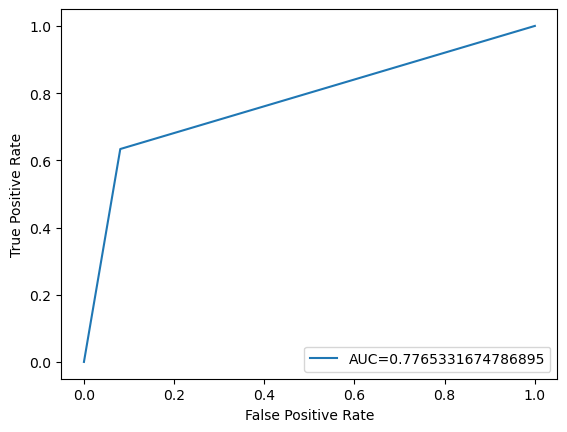

Confusion Matrix: 
 [[11433  1002]
 [ 1409  2437]]


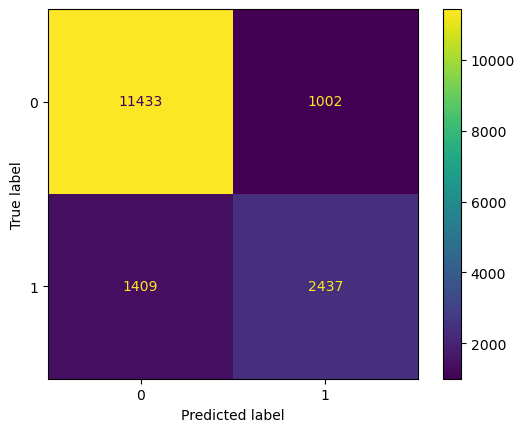

In [30]:
# Load the decision tree
import pickle
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score, precision_score, recall_score, roc_auc_score

# Load model
with open('output/dt/pruned_decision_tree.pkl', 'rb') as f:
    decision_tree = pickle.load(f)

print(decision_tree)

# Make predictions on the testing data
y_pred_test_tree = decision_tree.predict(x_test_tree)  # binary

# Evaluate the model 
print(classification_report(y_test_tree,y_pred_test_tree))
auc = roc_auc_score(y_test_tree, y_pred_test_tree) 
print('ROC_AUC score: {:.4f}'.format(auc))

#plotting roc curve
fpr, tpr, _ = roc_curve(y_test_tree, y_pred_test_tree)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test_tree, y_pred_test_tree))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### 2.2 Performance of k-NN

KNeighborsClassifier(leaf_size=16, metric='manhattan', n_neighbors=29)
              precision    recall  f1-score   support

           0       0.87      0.93      0.90     12435
           1       0.70      0.57      0.63      3846

    accuracy                           0.84     16281
   macro avg       0.79      0.75      0.76     16281
weighted avg       0.83      0.84      0.84     16281

ROC_AUC score: 0.7463


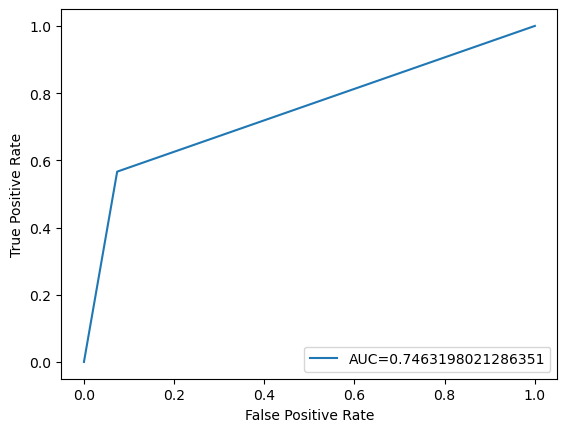

Confusion Matrix: 
 [[11519   916]
 [ 1668  2178]]


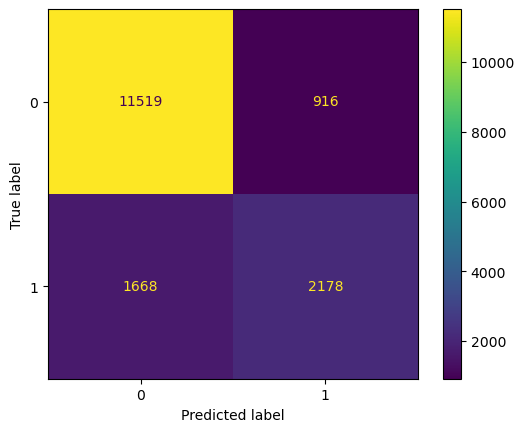

In [33]:
import joblib
import time

# Load k-NN model
knn_model = joblib.load('output/knn/kNN.pkl')
print(knn_model)

# Make predictions on the testing data
y_pred_test_knn = knn_model.predict(x_test_knn)  # binary result

# Evaluate the the model
print(classification_report(y_test_knn,y_pred_test_knn))
auc = roc_auc_score(y_test_knn,y_pred_test_knn)  # ROC score
print('ROC_AUC score: {:.4f}'.format(auc))

#plotting roc curve
fpr, tpr, _ = roc_curve(y_test_knn,y_pred_test_knn)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test_knn,y_pred_test_knn))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### 2.3 Performance of neural network

Model: "sequential_3"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_15 (Dense)            (None, 224)               3360      
                                                                 
 batch_normalization_12 (Bat  (None, 224)              896       
 chNormalization)                                                
                                                                 
 dropout_12 (Dropout)        (None, 224)               0         
                                                                 
 dense_16 (Dense)            (None, 128)               28800     
                                                                 
 batch_normalization_13 (Bat  (None, 128)              512       
 chNormalization)                                                
                                                                 
 dropout_13 (Dropout)        (None, 128)              

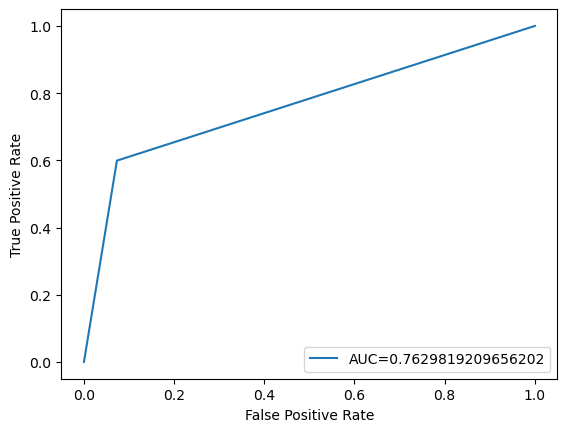

Confusion Matrix: 
 [[11526   909]
 [ 1542  2304]]


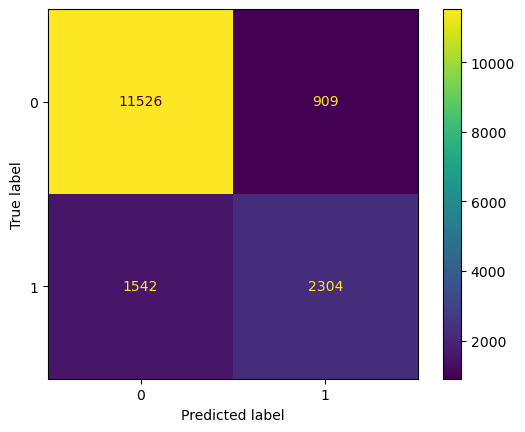

In [34]:
from tensorflow import keras
import numpy as np


# Load neutral network model
nn_model = keras.models.load_model('output/NeuralNetwork/NeuralNetwork.h5')
nn_model.summary()
# print(x_train_nn)
# print(x_train_nn.shape)

# Make predictions on the testing data
y_pred_test_nn_proba = nn_model.predict(x_test_nn)  # probability of ">50k"
y_pred_test_nn_proba = np.squeeze(y_pred_test_nn_proba)  # to 1-d array
y_pred_test_nn = np.where(y_pred_test_nn_proba > 0.5, 1, 0)  # probability to binary results

# Evaluate the model
print(classification_report(y_test_nn,y_pred_test_nn))
auc = roc_auc_score(y_test_nn, y_pred_test_nn)  # ROC score
print('ROC_AUC score: {:.4f}'.format(auc))

#plotting roc curve
fpr, tpr, _ = roc_curve(y_test_nn, y_pred_test_nn)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test_nn, y_pred_test_nn))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### 2.4 Performance of NB

              precision    recall  f1-score   support

           0       0.89      0.88      0.89     12435
           1       0.63      0.65      0.64      3846

    accuracy                           0.83     16281
   macro avg       0.76      0.76      0.76     16281
weighted avg       0.83      0.83      0.83     16281

ROC_AUC score: 0.7647


/Users/zoe/opt/anaconda3/envs/geospatial/lib/python3.8/site-packages/sklearn/base.py:299: UserWarning: Trying to unpickle estimator BernoulliNB from version 1.2.2 when using version 1.2.1. This might lead to breaking code or invalid results. Use at your own risk. For more info please refer to:
https://scikit-learn.org/stable/model_persistence.html#security-maintainability-limitations
  warnings.warn(


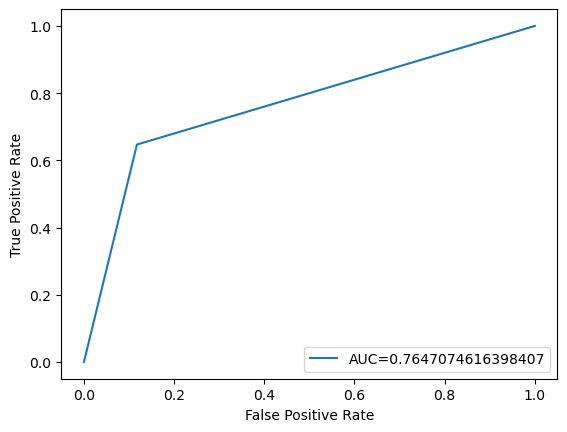

Confusion Matrix: 
 [[10974  1461]
 [ 1358  2488]]


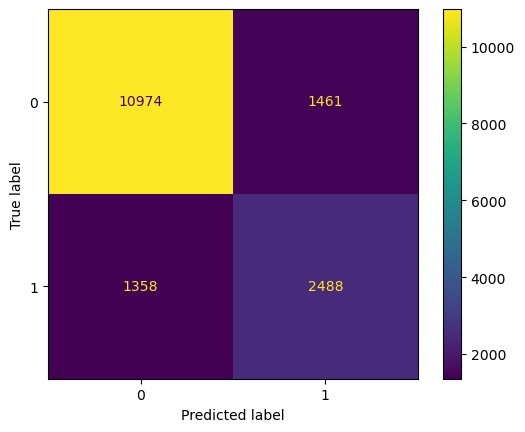

In [35]:
# Load NB model
nb_model = pickle.load(open('output/Bayes_Learning/BernoullilNaiveBayes.sav', 'rb'))

# Make predictions on the testing data
y_pred_test_nb = nb_model.predict(x_test_nb)

# Evaluate the model
print(classification_report(y_test_nb,y_pred_test_nb))
auc = roc_auc_score(y_test_nb, y_pred_test_nb)  # ROC score
print('ROC_AUC score: {:.4f}'.format(auc))

#plotting roc curve
fpr, tpr, _ = roc_curve(y_test_nb,y_pred_test_nb)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test_nb,y_pred_test_nb))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()

### 2.5 Performance of model ensemble

In [19]:
from scipy.stats import mode

class EnsembleModel():

    def __init__(self, voting):
        self.voting = voting
        

    def predict(self, predictions, weights=[]):
        # Stack the predictions into a single array
        predictions_stack = np.stack(predictions)  # stack prediction of base classifiers; shape: (num_of_base_models, num_of_test_instances)
        
        # print(predictions.shape)
        if (self.voting == "soft"):
            # Soft Voting
            # Compute the weighted average of the predictions along the first axis (i.e., across each column)
            if (weights == []):
                # Default: weights are equal
                soft_pred_prob = np.average(predictions_stack, axis=0)
            else:
                # Use passing weights
                soft_pred_prob = np.average(predictions_stack, axis=0, weights=weights)

            soft_pred = np.where(soft_pred_prob > 0.5, 1, 0)  # probability to 0/1
            return soft_pred
        else:
            # Hard Voting
            # Compute the mode of the predictions along the first axis (i.e., across each column)
            mode_pred = mode(predictions_stack, axis=0).mode
            mode_pred = np.transpose(mode_pred) 
            mode_pred = np.squeeze(mode_pred)
            # print(mode_pred)
            # print(mode_pred.shape)
            return mode_pred

509/509 [==============================] - 0s 825us/step
Time of prediction: 11.3803 s
              precision    recall  f1-score   support

           0       0.89      0.92      0.90     12435
           1       0.71      0.63      0.67      3846

    accuracy                           0.85     16281
   macro avg       0.80      0.78      0.79     16281
weighted avg       0.85      0.85      0.85     16281

Soft voting ROC_AUC score: 0.7768


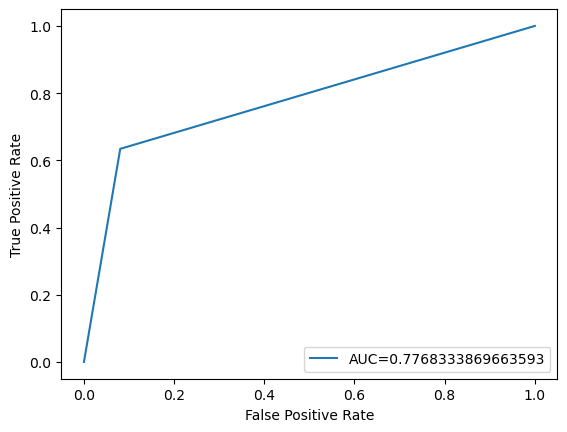

Confusion Matrix: 
 [[11434  1001]
 [ 1407  2439]]


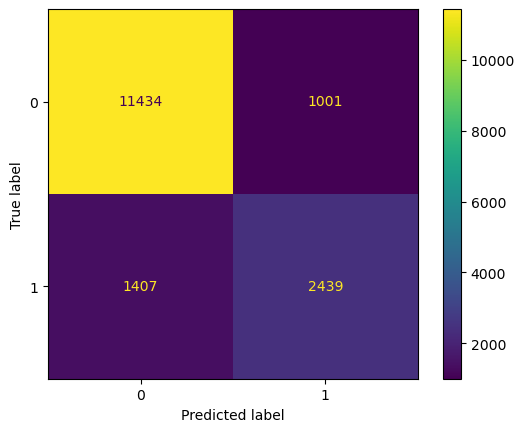

In [25]:
from sklearn.metrics import roc_curve, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import time

# Mark the start time
time_start = time.time()  

# Make predictions using dt
y_test = y_test_tree
y_pred_test_tree_proba = decision_tree.predict_proba(x_test_tree)[:, 1]  # probability of ">50k"
# Make predictions using knn
y_pred_test_knn_proba = knn_model.predict_proba(x_test_knn)[:, 1]  # probability of ">50k"
# Make predictions using nn
y_pred_test_nn_proba = nn_model.predict(x_test_nn)  # probability of ">50k"
y_pred_test_nn_proba = np.squeeze(y_pred_test_nn_proba)  # to 1-d array
# Make predictions using nb
y_pred_test_nb_proba = nb_model.predict_proba(x_test_nb)[:, 1]  # probability of ">50k"

predictions_test = [y_pred_test_tree_proba, y_pred_test_knn_proba, y_pred_test_nn_proba, y_pred_test_nb_proba]  # probability predictions for validation data

best_weights = [0.6, 0.013, 0.013, 0.013]  # decision tree dominate

model_ensemble = EnsembleModel("soft")  # soft voting model

# Make predictions on the testing data
soft_pred = model_ensemble.predict(predictions_test, best_weights)

# Mark the end time
time_end = time.time()  # mark the end time
total_execution_time = time_end - time_start
print('Time of prediction: {:.4f} s'.format(total_execution_time))


# Evaluate the model
print(classification_report(y_test,soft_pred))
auc = roc_auc_score(y_test, soft_pred)  # ROC score
print('Soft voting ROC_AUC score: {:.4f}'.format(auc))

#plotting roc curve
fpr, tpr, _ = roc_curve(y_test, soft_pred)
plt.plot(fpr,tpr,label="AUC="+str(auc))
plt.ylabel('True Positive Rate')
plt.xlabel('False Positive Rate')
plt.legend(loc=4)
plt.show()

#Confusion matrix
cm = (confusion_matrix(y_test,soft_pred,))
print('Confusion Matrix: \n', cm)
#confusion matrix plot
disp = ConfusionMatrixDisplay(cm)
disp.plot()
plt.show()